<a href="https://colab.research.google.com/github/BinXoai/Machine_Learning/blob/main/Telco_Customer_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data manipulation
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# data processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   MinMaxScaler, StandardScaler,
                                   LabelEncoder)
from sklearn.compose import ColumnTransformer

# imblanced dataset
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from imblearn.combine import SMOTEENN

# binary classification
from sklearn.preprocessing import PolynomialFeatures

# modelling
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
# display images
import graphviz

# metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,roc_curve

#Debug lỗi không import được xgboost
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier #!pip install xgboost

In [ ]:
gdrive_url = 'https://drive.google.com/file/d/1KtUYSsaKyWSuoqoxtK4vsOK6Dph57Mol/view'
gdrive_file_id = gdrive_url.split('/')[-2]
url='https://drive.google.com/uc?id=' + gdrive_file_id

df = pd.read_csv(url)

Data dictionary:

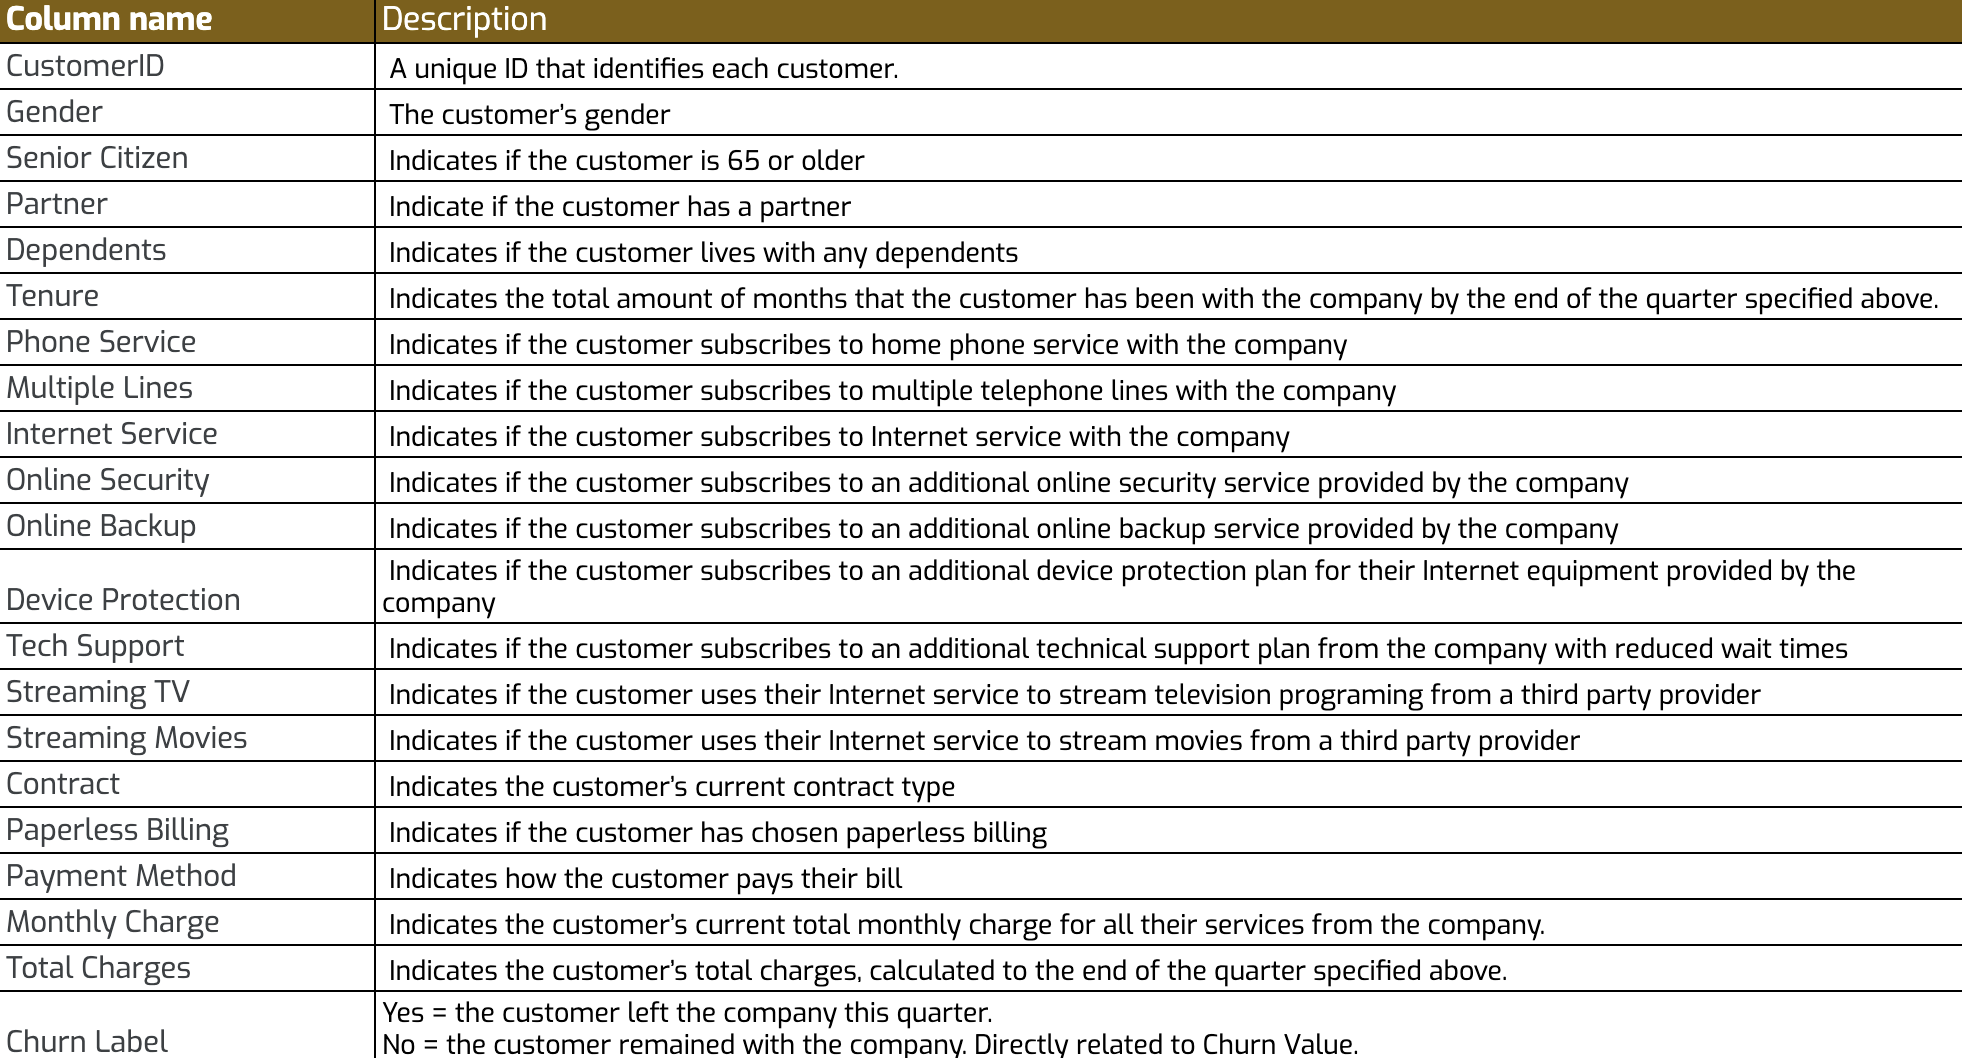

# 1. Preview Data


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3259,9620-ENEJV,Female,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),70.55,433.95,No
6667,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,Yes
2189,4195-PNGZS,Male,0,Yes,Yes,69,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.45,1718.2,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Xoá cột không cần thiết
df = df.drop(['customerID'], axis=1)

In [ ]:
#Xem phân bố data
n = df.shape[0]
for colname, dtype in df.dtypes.items():
    n_miss = df[colname].isna().sum()
    print("{cn:<30} | {dt:<7} | {nu:>5} | {cm:>7d} | {pm:>3.2f}%".format(
        cn=colname, dt=str(dtype), nu=df[colname].nunique(),
        cm=n_miss, pm=n_miss / n * 100
    ))

gender                         | object  |     2 |       0 | 0.00%
SeniorCitizen                  | int64   |     2 |       0 | 0.00%
Partner                        | object  |     2 |       0 | 0.00%
Dependents                     | object  |     2 |       0 | 0.00%
tenure                         | int64   |    73 |       0 | 0.00%
PhoneService                   | object  |     2 |       0 | 0.00%
MultipleLines                  | object  |     3 |       0 | 0.00%
InternetService                | object  |     3 |       0 | 0.00%
OnlineSecurity                 | object  |     3 |       0 | 0.00%
OnlineBackup                   | object  |     3 |       0 | 0.00%
DeviceProtection               | object  |     3 |       0 | 0.00%
TechSupport                    | object  |     3 |       0 | 0.00%
StreamingTV                    | object  |     3 |       0 | 0.00%
StreamingMovies                | object  |     3 |       0 | 0.00%
Contract                       | object  |     3 |       0 | 0

In [ ]:
# Thấy có SeniorCitizen đáng lẽ nên xếp vào Categorical
# TotalCharges nên chuyển qua dạng Numerical
pd.to_numeric(df.TotalCharges, errors='coerce').isna().sum()

11

In [ ]:
df.loc[pd.to_numeric(df.TotalCharges, errors='coerce').isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df[df.isna().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df = df.fillna(df['TotalCharges'].mean())

In [ ]:
#Hàm chuyển đổi categorical
features = ['gender','SeniorCitizen','Partner','Dependents',\
            'PhoneService','MultipleLines','InternetService','OnlineSecurity',\
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',\
            'StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod','Churn']
def convert_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype('category')
convert_cat(df,features)


In [ ]:
# data distribution
print('Numeric')
display(df.describe())  # numerical data

print('Categorical')
display(df.describe(exclude = [int, float]))  # categorical data

Numeric


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Categorical


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


**PHÂN LOẠI DATA**:


*   Categorical:
```
gender,	Partner,	Dependents,	PhoneService,	MultipleLines,	InternetService,	OnlineSecurity,	OnlineBackup,	DeviceProtection,	TechSupport,	StreamingTV,	StreamingMovies,	Contract,	PaperlessBilling,	PaymentMethod, Churn
```
*   Numerical:
```
tenure,	MonthlyCharges,	TotalCharges
```



# EDA
## A. Target Vailable

In [ ]:
#drop_cols = ['customer_id']
target_col = 'Churn'
# feature_cols = [col for col in df.columns
#                 if (col != target_col and
#                     not col in drop_cols)]
feature_cols = [col for col in df.columns
                if col != target_col]
df = df[sorted(feature_cols) + [target_col]]

In [ ]:
feature_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
df['Churn'].value_counts().to_frame()

,Churn
No,5174
Yes,1869


In [ ]:
df['Churn'].value_counts(normalize= True).to_frame()

,Churn
No,0.73463
Yes,0.26537


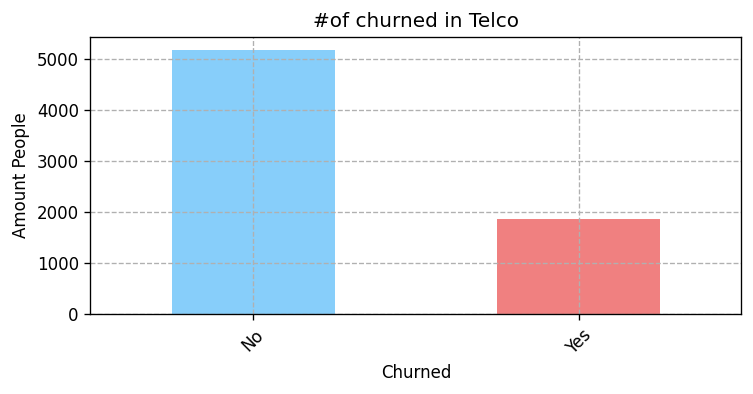

In [ ]:
colors = ['lightskyblue','lightcoral']

df['Churn'].value_counts().plot.bar(color=colors)

plt.xlabel('Churned')
plt.ylabel('Amount People')

plt.grid(linestyle = '--')

plt.title('#of churned in Telco')

x=[0,1]
label=['No', 'Yes']
plt.xticks(x, label, rotation=45);

Chỉ có 26% là nghỉ việc nên hiện tại đang bị mất cân bằng dữ liệu

## B. Categorical Features


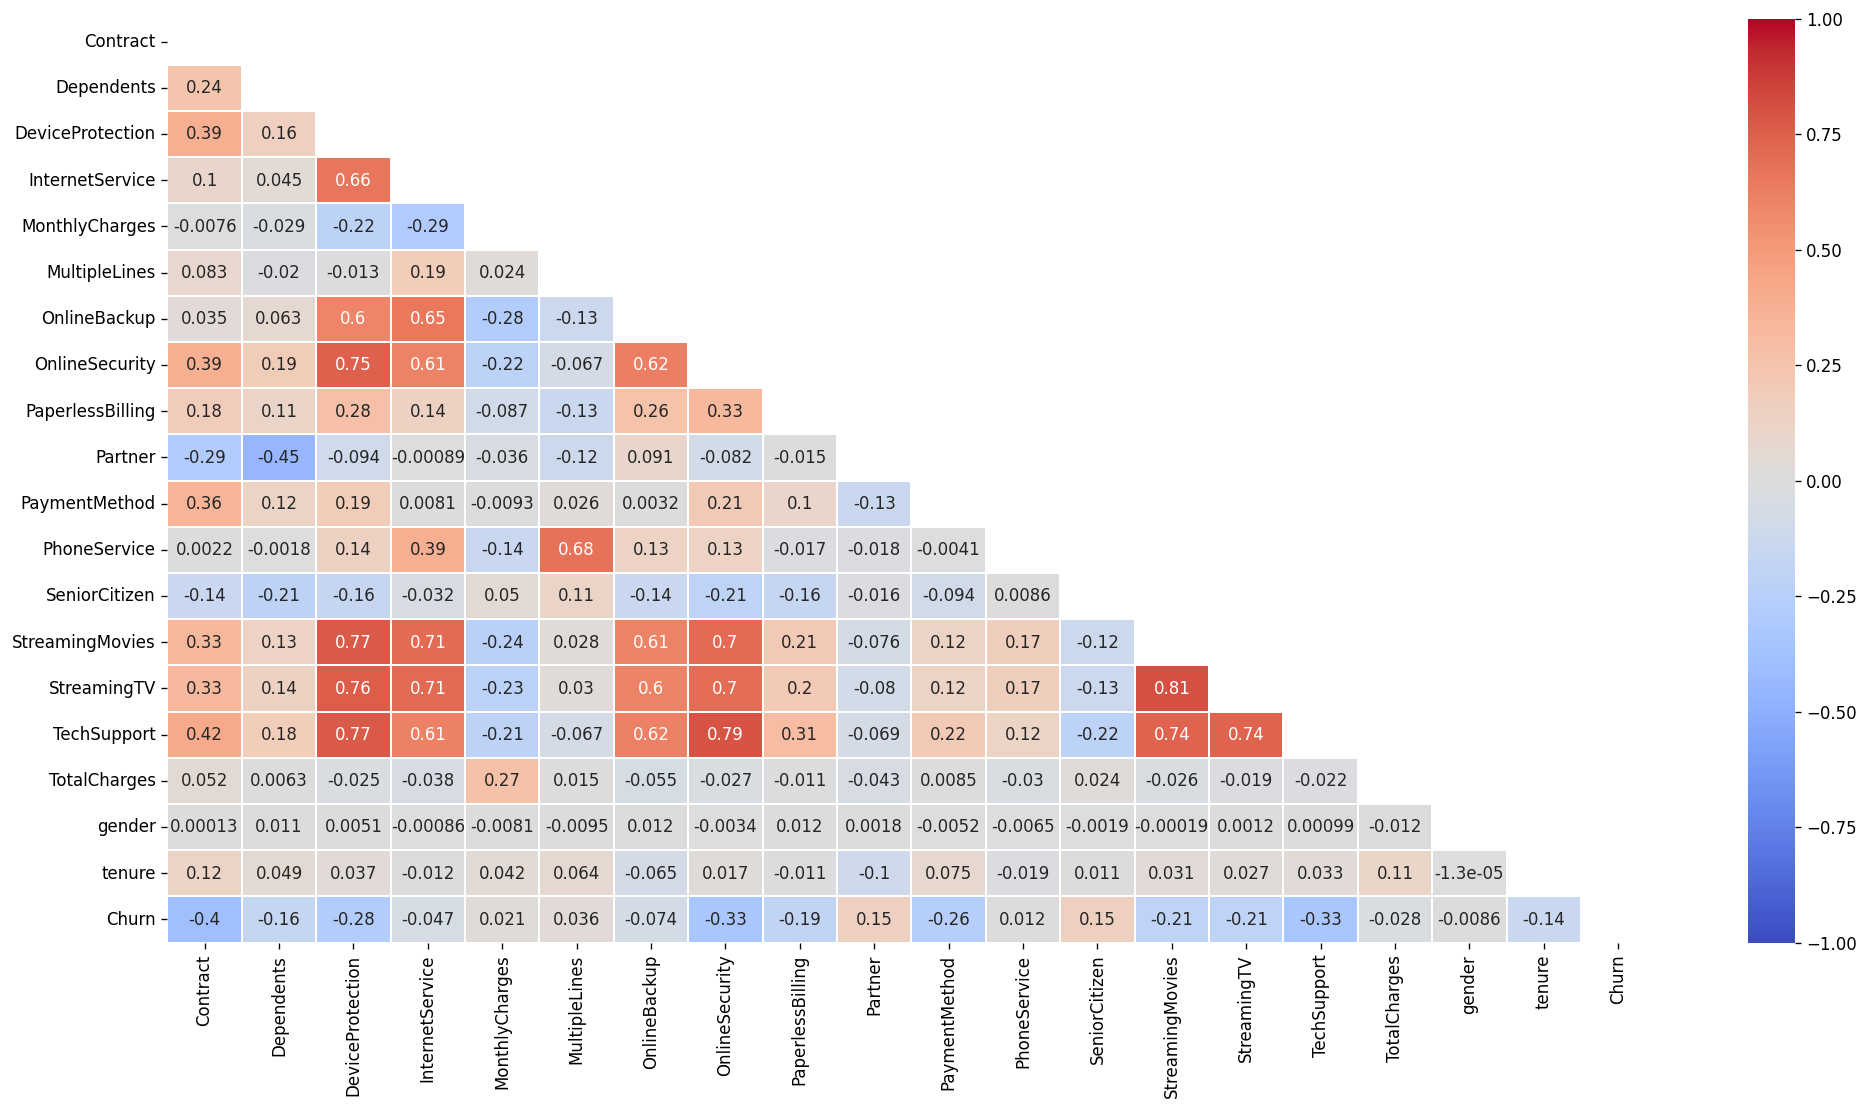

In [ ]:
#Vẽ hình ma trận tương quan (correlation matrix) để xem tương quan giữa các biến
plt.figure(figsize=(20, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
#Contract
df['Contract'].value_counts(normalize = True).to_frame()

,Contract
Month-to-month,0.550192
Two year,0.240664
One year,0.209144


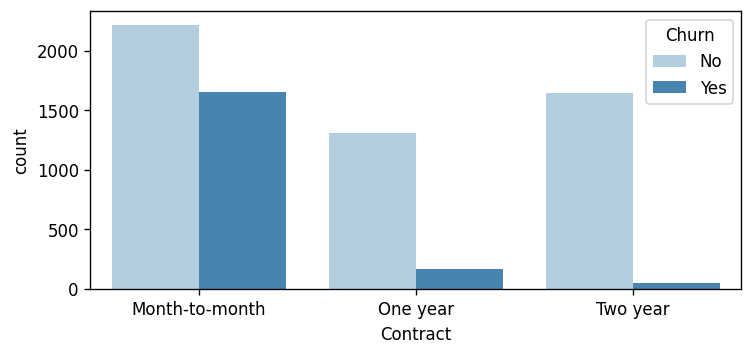

In [ ]:
sns.countplot(data = df, x='Contract', hue='Churn', palette = 'Blues');

Tỉ lệ churn sẽ tập trung vào những hợp đồng (Contact) Month-to-month là nhiều

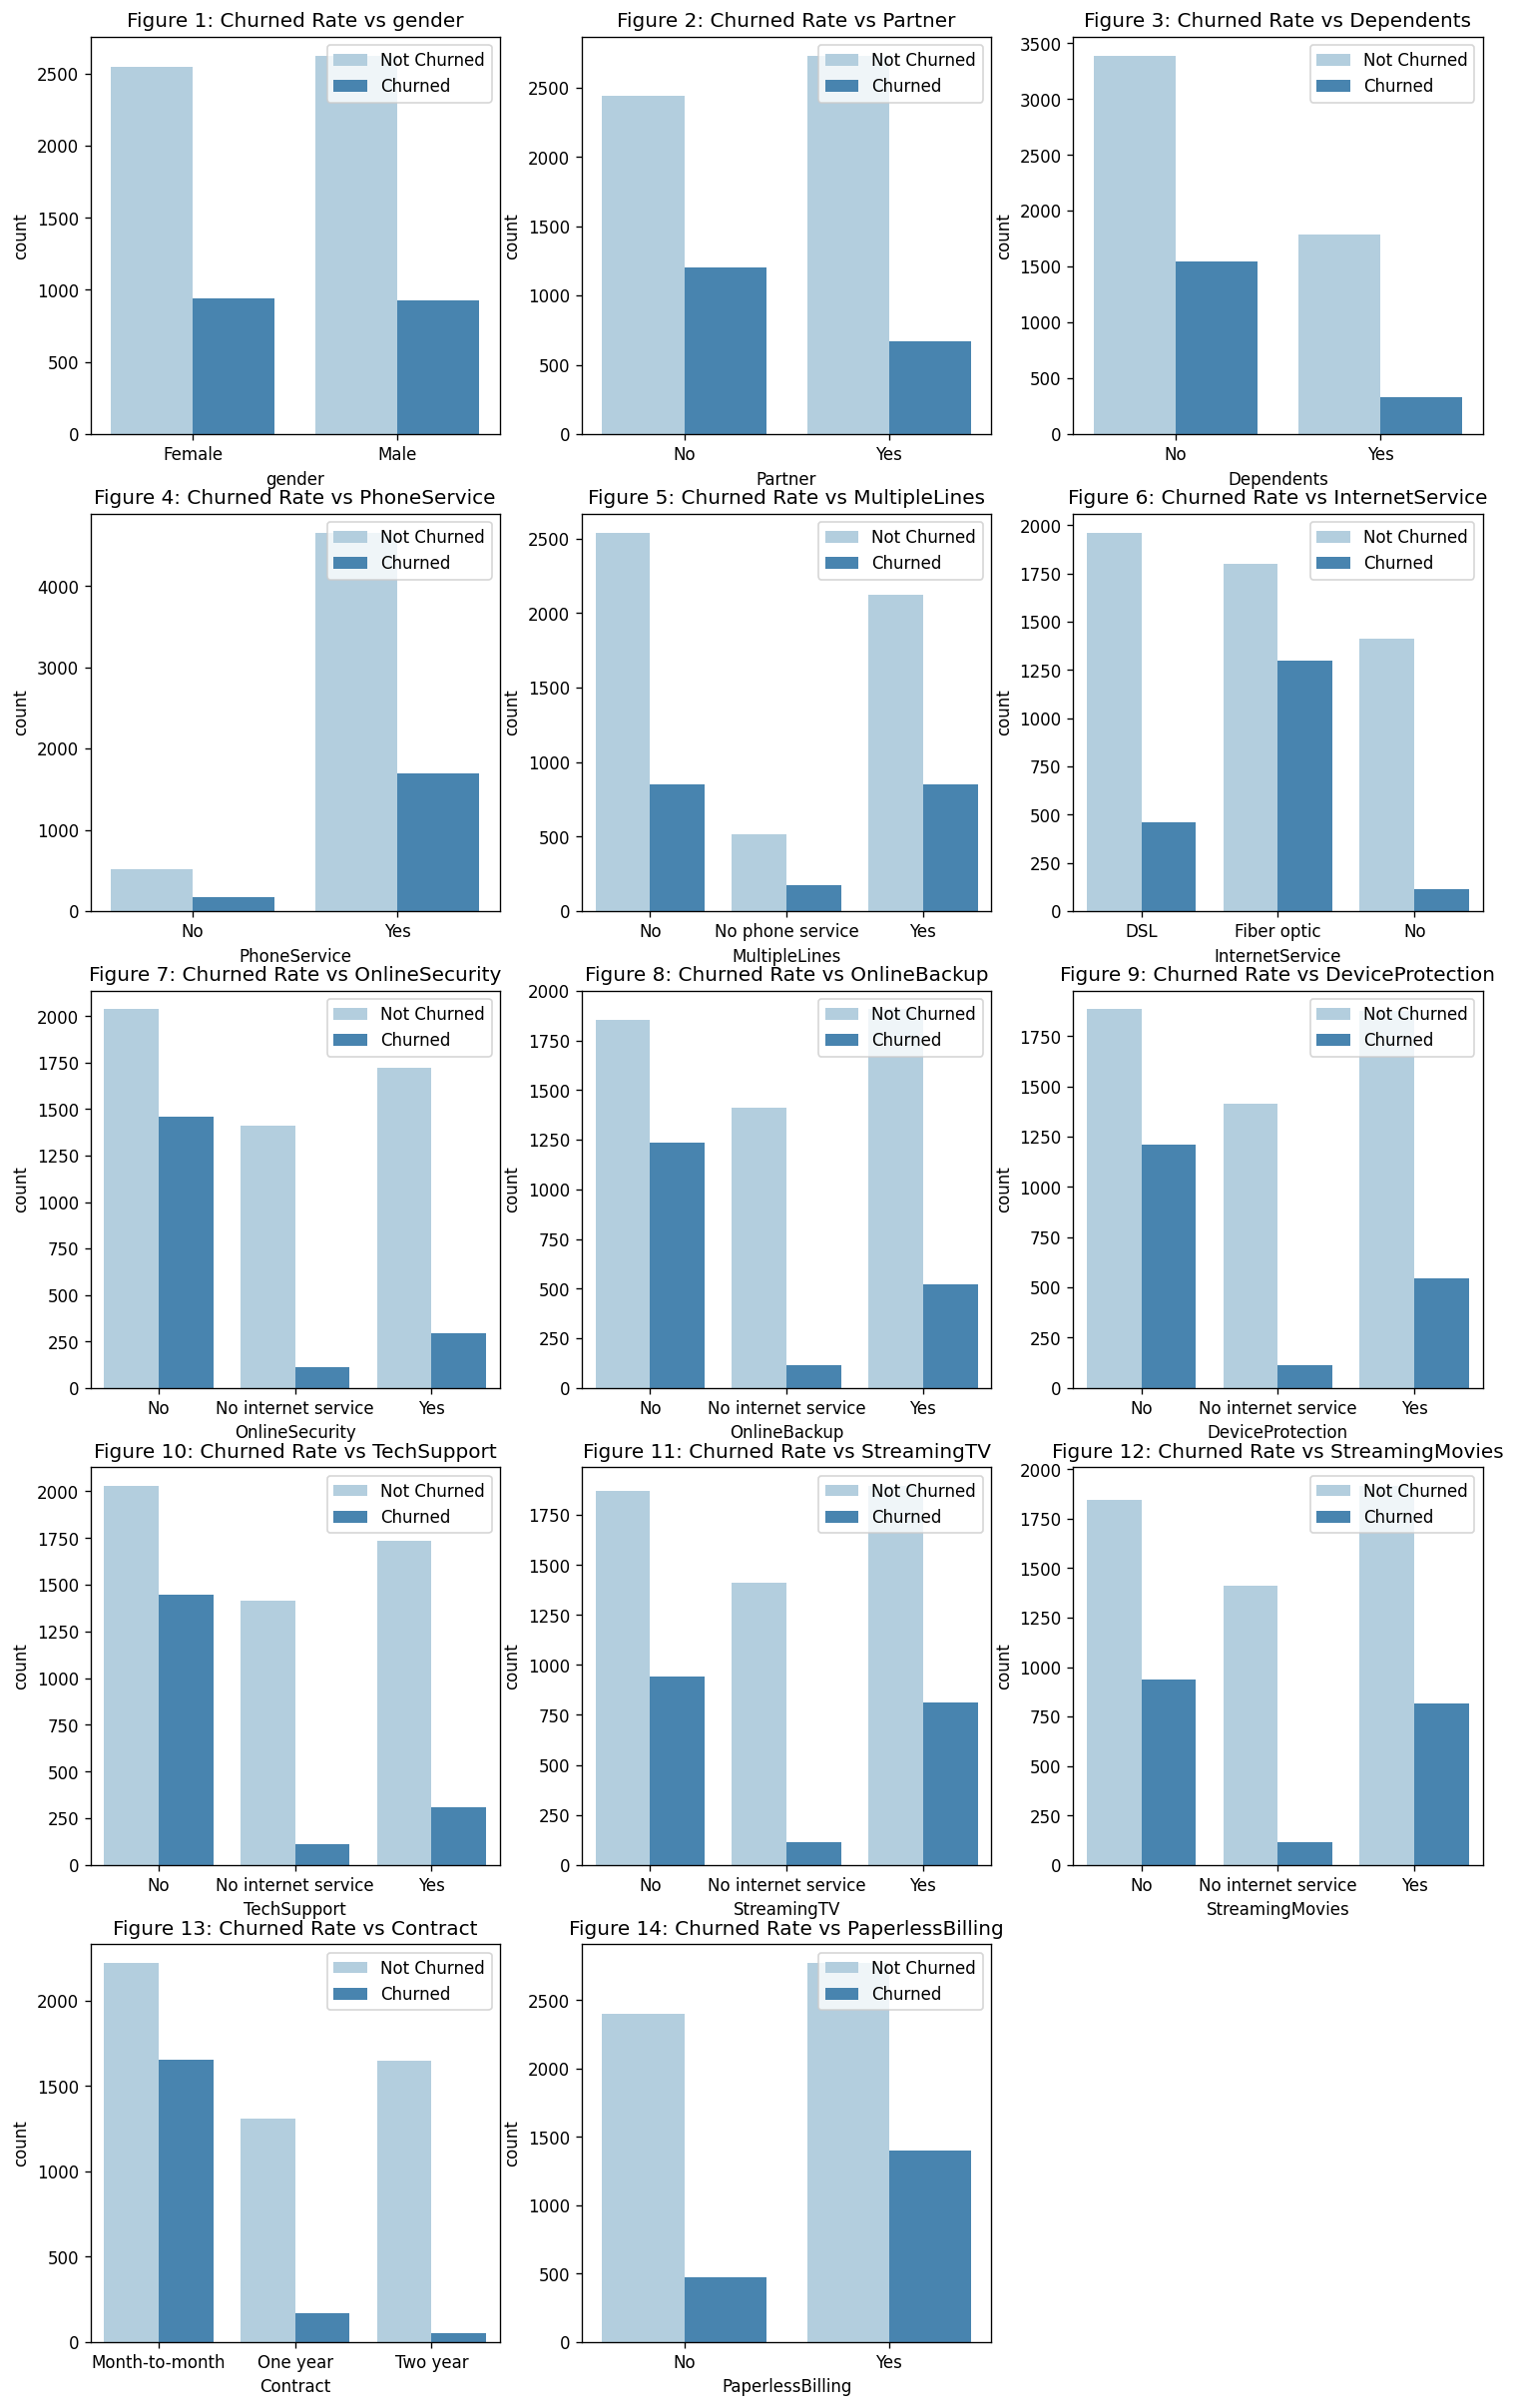

In [ ]:
cat_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines'\
        ,'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'\
        ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling'\
        ,'PaymentMethod','Churn']

n_rows = 5
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols* 5, n_rows*5))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(cat_cols):
      ax_i = ax[r,c]
      sns.countplot(data=df, x=cat_cols[i], hue='Churn', palette = 'Blues', ax = ax_i)
      ax_i.set_title(f"Figure {i+1}: Churned Rate vs {cat_cols[i]}")
      ax_i.legend(title='', loc='upper right', labels=['Not Churned', 'Churned'])

ax.flat[-1].set_visible(False)
plt.tight_layout
plt.show()

## C. Numerical Features

`tenure`

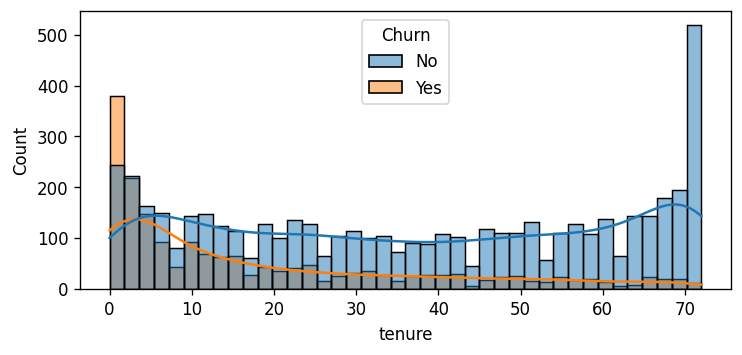

In [ ]:
sns.histplot(data=df, x='tenure', hue='Churn',bins=40,kde=True);

Số lượng người đã rời bỏ thuộc vào nhóm có tenure thấp từ 0-6 -> Công ty nên có chính sách để người dùng làm quen với app sẽ giúp cho việc người dùng ở lại tăng cao.

Ở các năm tiếp theo khi người dùng đã sử dụng quen với app thì tỉ lệ rời bỏ đã giảm hẳn

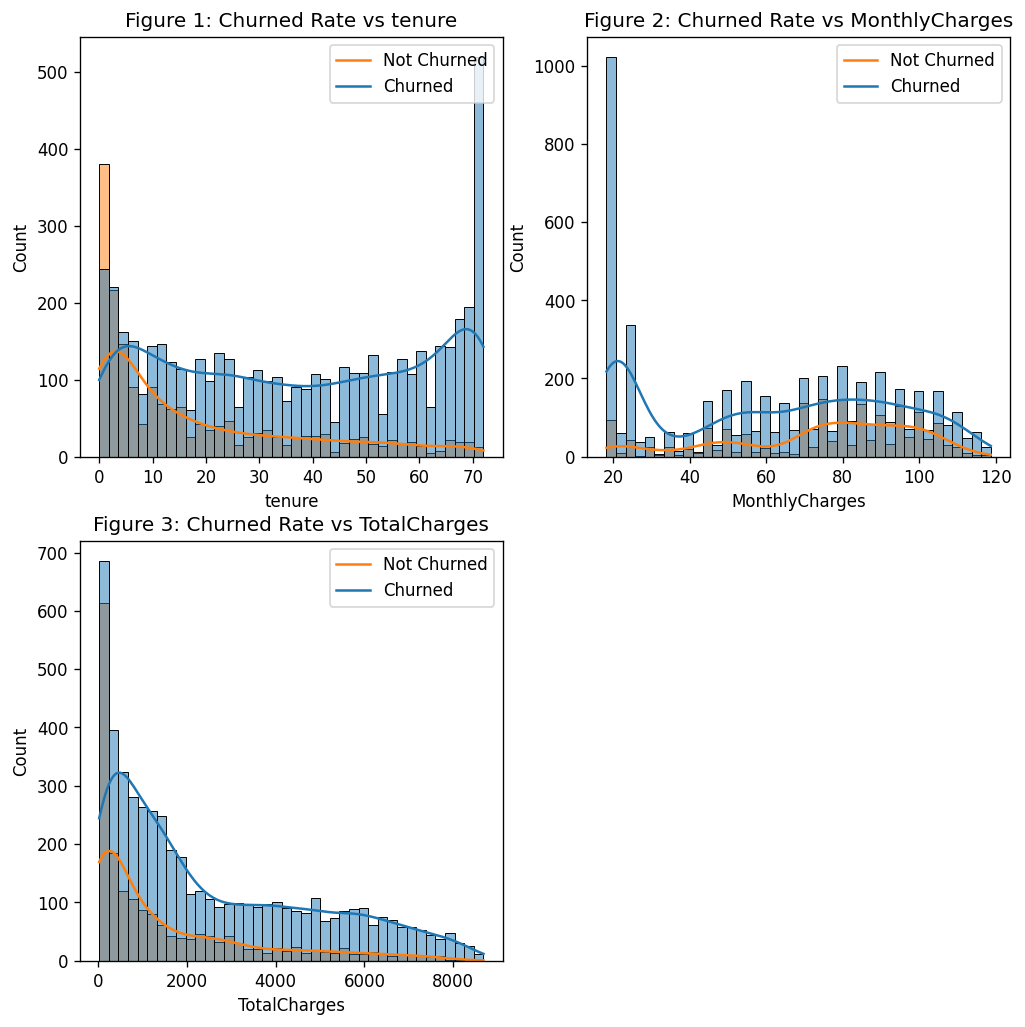

In [ ]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols* 5, n_rows*5))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(num_cols):
      ax_i = ax[r,c]
      sns.histplot(data=df, x= num_cols[i], hue='Churn',bins=40,kde=True,ax=ax_i);
      ax_i.set_title(f"Figure {i+1}: Churned Rate vs {num_cols[i]}")
      ax_i.legend(title='', loc='upper right', labels=['Not Churned', 'Churned'])

ax.flat[-1].set_visible(False)
plt.tight_layout
plt.show()

# 3. Data Wrangling

In [ ]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features =['Partner', 'Dependents', 'MultipleLines',
               'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
feature_cols = num_features + cat_features
print(feature_cols)

['tenure', 'MonthlyCharges', 'TotalCharges', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
def display_missing(df,feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        # if missing_count > 0:
        print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values. ")
display_missing(df,feature_cols)

Col tenure has 0.00% missing values. 
Col MonthlyCharges has 0.00% missing values. 
Col TotalCharges has 0.00% missing values. 
Col Partner has 0.00% missing values. 
Col Dependents has 0.00% missing values. 
Col MultipleLines has 0.00% missing values. 
Col OnlineSecurity has 0.00% missing values. 
Col DeviceProtection has 0.00% missing values. 
Col TechSupport has 0.00% missing values. 
Col StreamingTV has 0.00% missing values. 
Col StreamingMovies has 0.00% missing values. 
Col Contract has 0.00% missing values. 
Col PaperlessBilling has 0.00% missing values. 
Col PaymentMethod has 0.00% missing values. 


In [ ]:
X = df[feature_cols]
y = df['Churn']

In [ ]:
num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [ ]:
X = preprocessor.fit_transform(X)
X = pd.DataFrame(data=X, index=df.index,
                 columns=preprocessor.get_feature_names_out())
X.head(3)

,num__tenure,num__MonthlyCharges,num__TotalCharges,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,cat__MultipleLines_No,cat__MultipleLines_No phone service,cat__MultipleLines_Yes,...,cat__StreamingMovies_Yes,cat__Contract_Month-to-month,cat__Contract_One year,cat__Contract_Two year,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994971,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.066327,-0.259629,-0.173876,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.236724,-0.362660,-0.960399,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X.columns

Index(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'cat__Partner_No', 'cat__Partner_Yes', 'cat__Dependents_No',
       'cat__Dependents_Yes', 'cat__MultipleLines_No',
       'cat__MultipleLines_No phone service', 'cat__MultipleLines_Yes',
       'cat__OnlineSecurity_No', 'cat__OnlineSecurity_No internet service',
       'cat__OnlineSecurity_Yes', 'cat__DeviceProtection_No',
       'cat__DeviceProtection_No internet service',
       'cat__DeviceProtection_Yes', 'cat__TechSupport_No',
       'cat__TechSupport_No internet service', 'cat__TechSupport_Yes',
       'cat__StreamingTV_No', 'cat__StreamingTV_No internet service',
       'cat__StreamingTV_Yes', 'cat__StreamingMovies_No',
       'cat__StreamingMovies_No internet service', 'cat__StreamingMovies_Yes',
       'cat__Contract_Month-to-month', 'cat__Contract_One year',
       'cat__Contract_Two year', 'cat__PaperlessBilling_No',
       'cat__PaperlessBilling_Yes',
       'cat__PaymentMethod_Bank transfer (automati

In [ ]:
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [ ]:
y = df['Churn']

# 4. Model Training

In [ ]:
# Chia tập data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape, X_test.shape

((4930, 34), (2113, 34))

## A. Imbalance Data

In [ ]:
y_train.value_counts(normalize=True).to_frame()

,Churn
0,0.730426
1,0.269574


In [ ]:
data_res = SMOTEENN()
X_res, y_res = data_res.fit_resample(X_train, y_train)

## B. Logistic Regression

In [ ]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
log_reg.fit(X_res, y_res)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_test,y_test)

0.6975863700899195

In [ ]:
y_pred_logistic_regression = log_reg.predict(X_test)

In [ ]:
precision_score(y_test,y_pred_logistic_regression), recall_score(y_test, y_pred_logistic_regression)

(0.4522661523625844, 0.8685185185185185)

In [ ]:
print(classification_report(y_test, y_pred_logistic_regression))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1573
           1       0.45      0.87      0.59       540

    accuracy                           0.70      2113
   macro avg       0.69      0.75      0.68      2113
weighted avg       0.81      0.70      0.72      2113



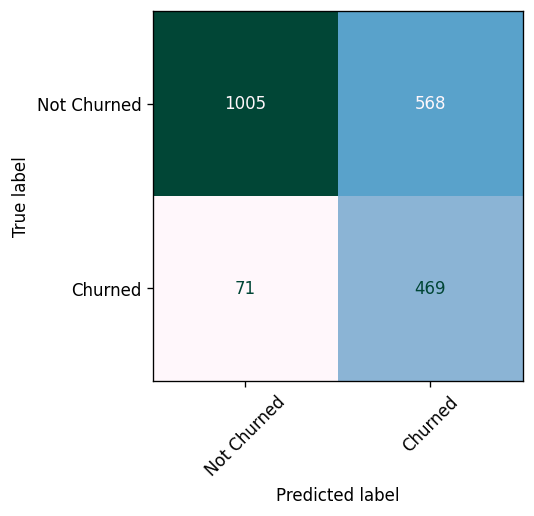

In [ ]:
#Đánh giá mô hình bằng confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_logistic_regression)
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['Not Churned','Churned']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_logistic_regression, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn")

### B.1 Polinomial Features

In [ ]:
poly = PolynomialFeatures(degree=3)
poly_features_X_res = poly.fit_transform(X_res)
poly_features_X_test = poly.transform(X_test)

In [ ]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000,random_state=0)
poly_log_reg.fit(poly_features_X_res, y_res)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_features_X_test,y_test)

0.7094178892569806

Sau khi nâng bậc thì thấy tốt lên

## C. Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, random_state = 0)
decision_tree.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [ ]:
y_pred_decision_tree = decision_tree.predict(X_test)

In [ ]:
#Đánh giá mô hình
accuracy_score(y_test, y_pred_decision_tree)

0.7231424514907714

In [ ]:
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1573
           1       0.47      0.79      0.59       540

    accuracy                           0.72      2113
   macro avg       0.69      0.75      0.69      2113
weighted avg       0.80      0.72      0.74      2113



In [ ]:
# Sử dụng vòng lặp for để tìm max_depth
score_total = []
for i in range(1,20):
  model_tree = DecisionTreeClassifier(max_depth=i)
  model_tree.fit(X_res, y_res)
  y_pred_decision_tree = model_tree.predict(X_test)
  score_total.append(accuracy_score(y_test, y_pred_decision_tree))

In [ ]:
score_total

[0.6412683388547089,
 0.6412683388547089,
 0.6919072408897302,
 0.7027922385234264,
 0.6824420255560814,
 0.6914339801230478,
 0.7188831045906294,
 0.7274017983909133,
 0.7250354945575012,
 0.7240889730241363,
 0.7269285376242309,
 0.7297681022243256,
 0.7278750591575959,
 0.7292948414576431,
 0.7240889730241363,
 0.7269285376242309,
 0.7269285376242309,
 0.7255087553241836,
 0.7245622337908187]

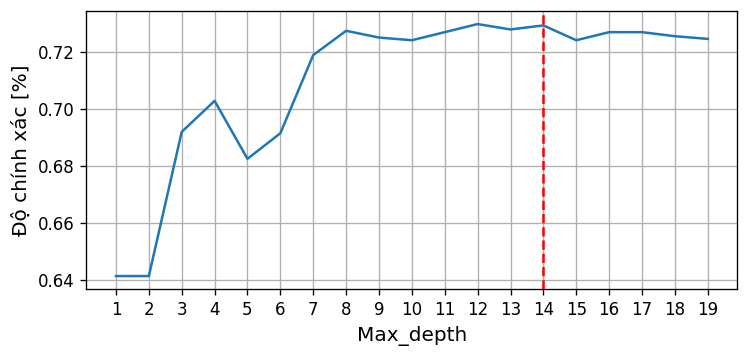

In [ ]:
#Vẽ hình thể hiện độ chính xác theo giá trị max_depth
plt.rcParams.update({'figure.figsize': (7,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]', fontsize=12)
plt.xlabel('Max_depth', fontsize=12)
plt.plot(range(1,20),score_total)
plt.xticks(range(1,20))
plt.axvline(x=14, color = 'r', linestyle='--')
plt.grid('minor')

Vậy chọn Max_depth = 14 thì mô hình Decision Tree sẽ tối ưu nhất : 0.7311878845243729

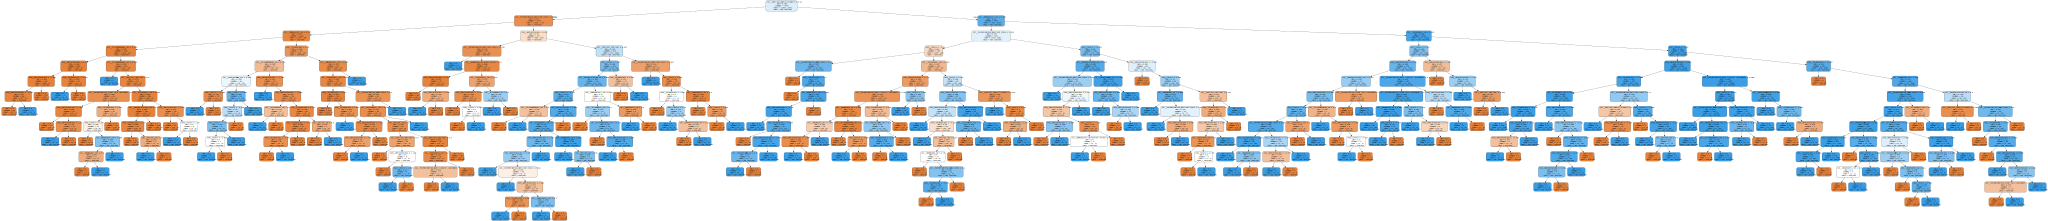

In [ ]:
# Chúng ta có thể vẽ lại cây quyết định như sau
model = tree.DecisionTreeClassifier(max_depth=14)
model = model.fit(X_res, y_res)#Tính toán/fit model
dot_data = tree.export_graphviz(model, out_file=None,feature_names=['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'cat__Partner_No', 'cat__Partner_Yes', 'cat__Dependents_No',
       'cat__Dependents_Yes', 'cat__MultipleLines_No',
       'cat__MultipleLines_No phone service', 'cat__MultipleLines_Yes',
       'cat__OnlineSecurity_No', 'cat__OnlineSecurity_No internet service',
       'cat__OnlineSecurity_Yes', 'cat__DeviceProtection_No',
       'cat__DeviceProtection_No internet service',
       'cat__DeviceProtection_Yes', 'cat__TechSupport_No',
       'cat__TechSupport_No internet service', 'cat__TechSupport_Yes',
       'cat__StreamingTV_No', 'cat__StreamingTV_No internet service',
       'cat__StreamingTV_Yes', 'cat__StreamingMovies_No',
       'cat__StreamingMovies_No internet service', 'cat__StreamingMovies_Yes',
       'cat__Contract_Month-to-month', 'cat__Contract_One year',
       'cat__Contract_Two year', 'cat__PaperlessBilling_No',
       'cat__PaperlessBilling_Yes',
       'cat__PaymentMethod_Bank transfer (automatic)',
       'cat__PaymentMethod_Credit card (automatic)',
       'cat__PaymentMethod_Electronic check',
       'cat__PaymentMethod_Mailed check'],class_names=['Churned','Not Churned'],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

## D. Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators= 5, max_depth = 1, random_state=0)
random_forest.fit(X_res, y_res)

RandomForestClassifier(max_depth=1, n_estimators=5, random_state=0)

In [ ]:
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_random_forest)

0.6213913866540464

In [ ]:
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.94      0.53      0.67      1573
           1       0.39      0.89      0.55       540

    accuracy                           0.62      2113
   macro avg       0.66      0.71      0.61      2113
weighted avg       0.80      0.62      0.64      2113



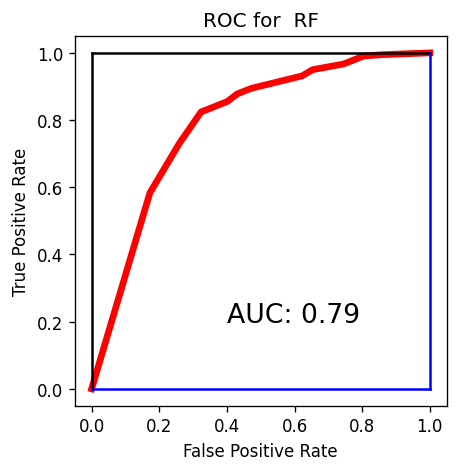

In [ ]:
#Đánh giá theo ROC và AUC
y_probabilities = random_forest.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Tìm hyperparameter tốt nhất

In [ ]:
#hyperparameter turning
random_forest = RandomForestClassifier()

grid_space = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 20, 30],
    'criterion': ['gini','entropy']
}
random_forest_grid = GridSearchCV(random_forest, param_grid=grid_space, scoring='accuracy')
model_grid = random_forest_grid.fit(X_res, y_res)

In [ ]:
#Hiện thị hyperparameter tốt nhất
model_grid.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 20}

In [ ]:
y_pred_random_forest=model_grid.predict(X_test)
accuracy_score(y_test,y_pred_random_forest)

0.73450070989115

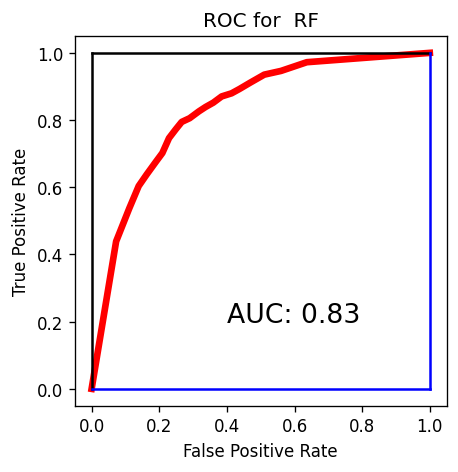

In [ ]:
#Đánh giá theo ROC và AUC sau khi đã tìm được hyperparameter tốt nhất
y_probabilities = model_grid.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## E. K Nearest Neighbor (KNN)

In [ ]:
KNeighbors = KNeighborsClassifier(n_neighbors=5)
KNeighbors.fit(X_res, y_res)

KNeighborsClassifier()

In [ ]:
y_pred_KNN = KNeighbors.predict(X_test)

In [ ]:
#Tính toán độ chính xác
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_KNN))

Accuracy: 0.6611452910553716


In [ ]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1573
           1       0.42      0.87      0.57       540

    accuracy                           0.66      2113
   macro avg       0.68      0.73      0.64      2113
weighted avg       0.80      0.66      0.68      2113



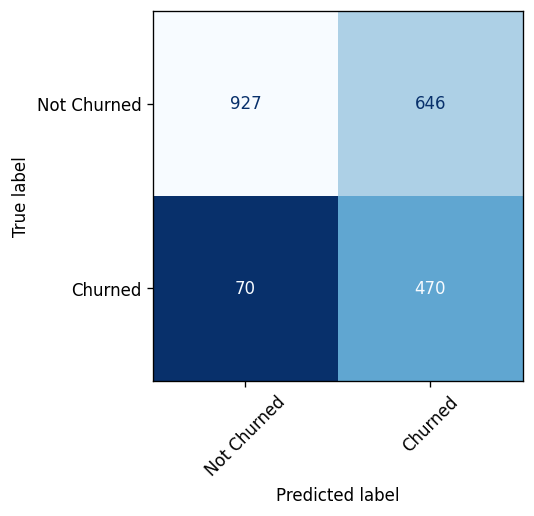

In [ ]:
#Đánh giá mô hình bằng confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_KNN)
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['Not Churned', 'Churned']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_KNN, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

### Tìm n_neighbors để mô hình tối ưu nhất

In [ ]:
ac=[] #Tạo list rỗng chứa giá trị của độ chính xác
for k in range (2,20,1):
  KNeighbors = KNeighborsClassifier(n_neighbors=k)
  KNeighbors.fit(X_res, y_res)
  y_pred_KNN = KNeighbors.predict(X_test)
  ac.append(metrics.accuracy_score(y_test, y_pred_KNN))
  print("Accuracy at k =",k,metrics.accuracy_score(y_test, y_pred_KNN))

Accuracy at k = 2 0.7136772361571225
Accuracy at k = 3 0.6672976810222433
Accuracy at k = 4 0.6862281116895409
Accuracy at k = 5 0.6611452910553716
Accuracy at k = 6 0.673450070989115
Accuracy at k = 7 0.6559394226218647
Accuracy at k = 8 0.6644581164221486
Accuracy at k = 9 0.6497870326549929
Accuracy at k = 10 0.6658778987221959
Accuracy at k = 11 0.6512068149550402
Accuracy at k = 12 0.6587789872219593
Accuracy at k = 13 0.6502602934216754
Accuracy at k = 14 0.661618551822054
Accuracy at k = 15 0.6497870326549929
Accuracy at k = 16 0.6587789872219593
Accuracy at k = 17 0.6474207288215806
Accuracy at k = 18 0.6583057264552769
Accuracy at k = 19 0.6431613819214387


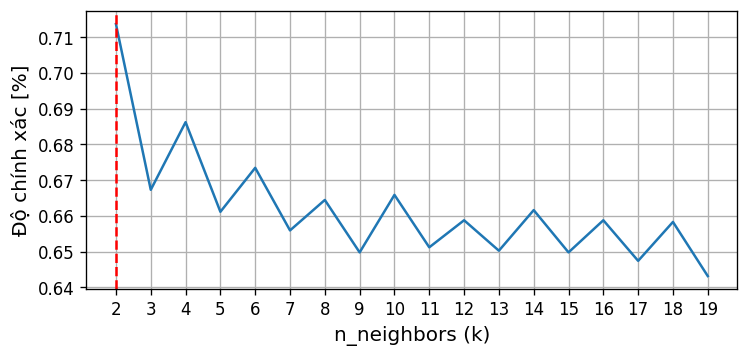

In [ ]:
#Vẽ hình thể hiện độ chính xác theo giá trị n_neighbors
plt.ylabel('Độ chính xác [%]',fontsize=12)
plt.xlabel('n_neighbors (k)',fontsize=12)
plt.plot(range(2, 20), ac)
plt.xticks(range(2, 20))
plt.axvline(x=2, color='r', linestyle='--')
plt.grid('minor')

Vậy chọn n_neighbors = 2 thì mô hình KNN sẽ có kết quả tốt nhất

## F. Support Vector Machine

In [ ]:
#Bài toán phân loại nên dùng SVC
SVC_model = SVC(kernel='linear', C= 0.001, gamma=0.0001) # Sử dụng Linear Kernel
SVC_model.fit(X_res, y_res)

SVC(C=0.001, gamma=0.0001, kernel='linear')

In [ ]:
y_pred_SVC = SVC_model.predict(X_test)

In [ ]:
#Tính toán độ chính xác
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVC))

Accuracy: 0.7027922385234264


In [ ]:
#In ra báo cáo đánh giá của mô hình
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1573
           1       0.46      0.85      0.59       540

    accuracy                           0.70      2113
   macro avg       0.69      0.75      0.68      2113
weighted avg       0.81      0.70      0.72      2113



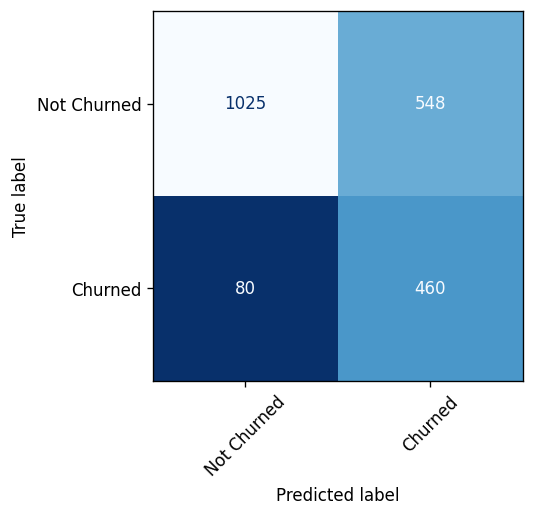

In [ ]:
#Đánh giá mô hình bằng confusion matrix
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['Not Churned', 'Churned']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_SVC, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

### Nâng cao độ chính xác của mô hình với grid search

In [ ]:
#Tìm kiếm hyperparameter
hps={
    'C': [0.001, 0.01, 0.1 ],#1,10, 100, 1000],
    'gamma' : [0.001, 0.01,0.1],# 1,100,1000],
    'kernel' : ['linear']#, 'poly', 'rbf', 'sigmoid'],
}
SVC_model_grid= GridSearchCV(SVC(),hps)
SVC_model = SVC_model_grid.fit(X_res, y_res)

In [ ]:
#Hiện thị hyperpameter tốt nhất
SVC_model.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
y_pred_SVC = SVC_model.predict(X_test)
accuracy_score(y_test, y_pred_SVC )

0.702318977756744

In [ ]:
#In ra báo cáo đánh giá của mô hình
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76      1573
           1       0.46      0.86      0.59       540

    accuracy                           0.70      2113
   macro avg       0.69      0.75      0.68      2113
weighted avg       0.81      0.70      0.72      2113



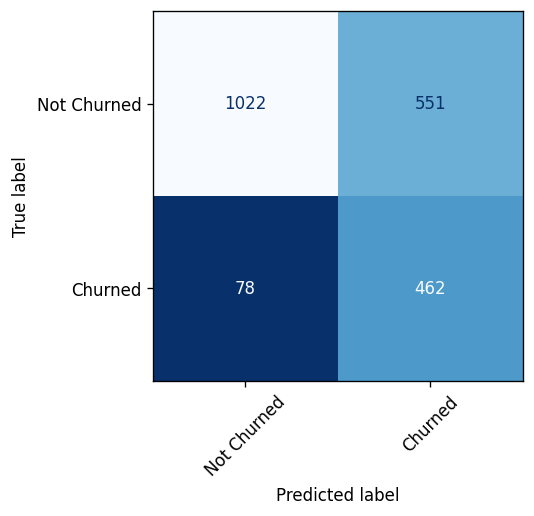

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['Not Churned', 'Churned']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_SVC, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

# 4. Baseline Model Comparison

In [ ]:
seed = 0
models = [
    LinearSVC(dual=True, max_iter = 12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric = 'logloss', random_state=seed)
]

In [ ]:
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    #Define k-fold                    #X, y là Cái ghi vào
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X,y,scoring=metrics,cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x = 'model_name', y = 'accuracy_score', data=cv_df, color='lightblue', showmeans = True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean,std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    # Sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending = False, inplace=True)

    return baseline_results



    return cv_df
generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)

,Mean,Standard Deviation
model_name,,
SVC,0.799234,0.011541
LinearSVC,0.798950,0.010566
AdaBoostClassifier,0.798241,0.010423
RandomForestClassifier,0.784183,0.005806
XGBClassifier,0.781060,0.008337
ExtraTreesClassifier,0.766292,0.007076
KNeighborsClassifier,0.763310,0.012853
DecisionTreeClassifier,0.728525,0.011816



**Vậy nên chọn SVC để xây dựng mô hình**